Problem Statement 1:
Amit wants to purchase office space. 
He does a detailed survey of the offices and corporate complexes in the area and tries to quantify a lot of factors, such as the distance of the offices from residential and other commercial areas, schools, and workplaces; the reputation of the construction companies, and builders involved in constructing the apartments; the distance of the offices from highways, freeways, and important roads; the facilities around the office space and so on.
Each of these factories was quantified, normalized, and mapped to values on a scale of 0 to 1. 
Amit then makes a table. 
Each row in the table corresponds to Amit's observations for a particular house. 
If Amit has observed and noted F features, the row contains F values separated by a single space, followed by the office-space price in dollars/square-foot. 
If Amit makes observations for H houses, his observation table has (F+1) columns and H rows, and a total of (F+1) * H entries.
Amit does several such surveys and provides you with the tabulated data. At the end of these tables are some rows which have just F columns (the price per square foot is missing). 
Your task is to predict these prices. F can be any integer number between 1 and 5, both inclusive.
There is one important observation that Amit has made. The prices per square foot, are (approximately) a polynomial function of the features in the observation table. This polynomial always has an order less than 4
Dataset: data.csv
Input values in the dataset:
The first line contains F and N. Over here, F is the number of observed features. N is the number of rows for which features as well as price per square foot.


In [201]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [193]:
dataset = pd.read_csv('data.csv')

In [194]:
dataset.head()

,F,N,Prprice per square foot
0,0.44,0.68,511.14
1,0.99,0.23,717.10
2,0.84,0.29,607.91
3,0.28,0.45,270.40
4,0.07,0.83,289.88


In [195]:
dataset.shape

(100, 3)

### Dataset has 100 rows and 3 columns

In [196]:
dataset.isnull()

,F,N,Prprice per square foot
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
95,False,False,False
96,False,False,False
97,False,False,False
98,False,False,False


In [141]:
dataset.isnull().sum()

F                          0
N                          0
Prprice per square foot    0
dtype: int64

### Datset has no missing values

In [142]:
dataset.describe()

,F,N,Prprice per square foot
count,100.000000,100.000000,100.000000
mean,0.550300,0.501700,554.214600
std,0.293841,0.307124,347.312796
min,0.010000,0.000000,42.080000
25%,0.300000,0.230000,278.172500
50%,0.570000,0.485000,514.285000
75%,0.822500,0.760000,751.752500
max,1.000000,0.990000,1563.820000


In [143]:
dataset['F'].nunique()

65

In [144]:
dataset['N'].nunique()

61

<AxesSubplot:ylabel='Frequency'>

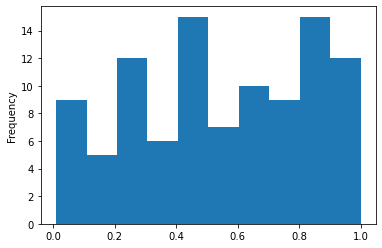

In [145]:
dataset['F'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

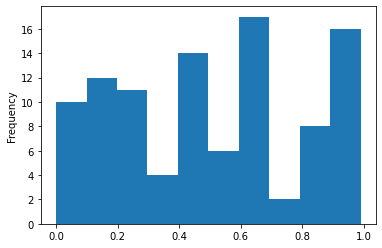

In [146]:
dataset['N'].plot.hist()

<AxesSubplot:>

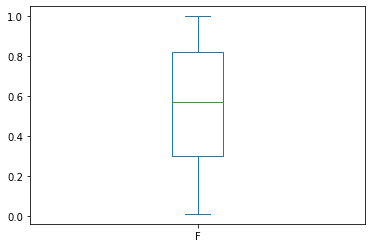

In [147]:
dataset['F'].plot.box()

<AxesSubplot:>

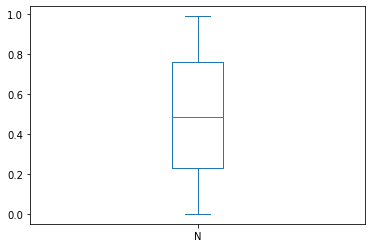

In [148]:
dataset['N'].plot.box()

# Split data into independent(X) and dependent varriable(y)

In [149]:
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values 

In [150]:
X[:5]

array([[0.44, 0.68],
       [0.99, 0.23],
       [0.84, 0.29],
       [0.28, 0.45],
       [0.07, 0.83]])

In [151]:
y[:5]

array([511.14, 717.1 , 607.91, 270.4 , 289.88])

# Spliting dataset into Train and test data

In [152]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state= 3)

In [153]:
X_train[:5]

array([[0.79, 0.97],
       [0.73, 0.01],
       [0.87, 0.91],
       [0.41, 0.15],
       [0.98, 0.3 ]])

In [154]:
X_train.shape

(67, 2)

In [155]:
X_test.shape

(33, 2)

# Building model

### Using multi linear regression

In [156]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

# Prediction

In [157]:
y_pred=reg.predict(X_test)
y_pred

array([ 246.60350099, 1243.19550123,  979.3844517 ,   78.12146257,
        296.70487137,  747.49684523,  528.51223818,  653.96626324,
         -1.98456226,  303.61774907,  582.13022715,  615.29042177,
        819.41312098,  722.64675918,  615.37066142,  667.02974196,
        720.80821023,  378.85004428, 1149.70503907, 1056.33493638,
        544.21666237,  867.6759424 ,  708.86112359,  368.21994885,
       1081.22514226,   59.86329562,  585.64684574,  757.68562258,
        521.75983978, -162.27685159,  387.12003303,  840.86694792,
       1134.68265192])

In [158]:
X_test[:3]

array([[0.22, 0.46],
       [0.99, 0.99],
       [0.73, 0.92]])

In [160]:
y_test[:3]

array([ 237.69, 1563.82, 1038.09])

In [161]:
reg.predict([[0.22, 0.46]])

array([246.60350099])

Here the test value for F=0.22 and N= 0.46 is 237.69 and predicted is 246.60

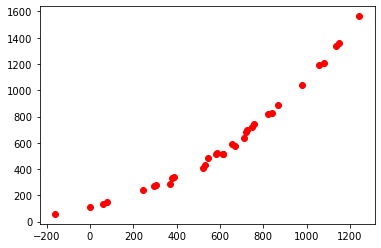

In [200]:
plt.scatter(y_pred, y_test, color = 'red')

### Using polynomial Regression

In [221]:
X = dataset.iloc[:,0].values
y = dataset.iloc[:,-1].values

In [222]:
X=X.reshape(-1,1)

In [223]:
X

array([[0.44],
       [0.99],
       [0.84],
       [0.28],
       [0.07],
       [0.66],
       [0.73],
       [0.57],
       [0.43],
       [0.27],
       [0.43],
       [0.87],
       [0.78],
       [0.9 ],
       [0.41],
       [0.52],
       [0.47],
       [0.65],
       [0.85],
       [0.93],
       [0.41],
       [0.36],
       [0.78],
       [0.69],
       [0.04],
       [0.17],
       [0.68],
       [0.84],
       [0.38],
       [0.12],
       [0.62],
       [0.79],
       [0.82],
       [0.91],
       [0.35],
       [0.57],
       [0.52],
       [0.31],
       [0.6 ],
       [0.99],
       [0.48],
       [0.3 ],
       [0.58],
       [0.65],
       [0.6 ],
       [0.95],
       [0.47],
       [0.15],
       [0.01],
       [0.26],
       [0.01],
       [0.45],
       [0.09],
       [0.96],
       [0.63],
       [0.06],
       [0.1 ],
       [0.26],
       [0.41],
       [0.91],
       [0.83],
       [0.44],
       [0.2 ],
       [0.43],
       [0.21],
       [0.88],
       [0.

In [224]:
y

array([ 511.14,  717.1 ,  607.91,  270.4 ,  289.88,  830.85, 1038.09,
        455.19,  640.17,  511.06,  177.03, 1242.52,  891.37, 1339.72,
        169.88,  276.05,  517.43,  522.25,  932.21,  851.25,  640.11,
        308.68, 1046.05,  332.4 ,  171.85,  109.55,  361.97,  872.21,
        303.7 ,  256.38,  341.2 , 1194.63,  408.6 ,  895.54,  518.25,
        638.75,  301.9 ,  163.38,  240.77, 1449.05,  609.  ,  174.59,
        593.45,  355.96,  671.46, 1193.7 ,  278.88,  411.4 ,   42.08,
        166.19,   58.62,  642.45,  368.14,  702.78,  615.74,  143.79,
        109.  ,  328.28,  205.16, 1360.49,  905.83,  487.33,  202.76,
        202.01,  148.87,  745.3 ,  503.04, 1563.82,  165.21,  438.4 ,
         98.47,  819.63,  174.44,  483.13,  534.24,  572.31,  957.61,
        518.29, 1143.49, 1211.31,  784.74,  283.7 ,  684.38,  719.46,
        292.23,  775.68,  130.77,  801.6 ,  323.55,  726.9 ,  661.12,
        771.11, 1016.14,  237.69,  325.89,  636.22,  272.12,  696.65,
        434.53,  593

In [225]:
# Splitting the dataset:
from sklearn.model_selection import train_test_split
X_train, X_test ,Y_train, y_test = train_test_split(X,y,test_size=0.3,random_state = 0)

In [226]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X,y)

LinearRegression()

In [227]:
from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X)
lin_reg_2  = LinearRegression()
lin_reg_2.fit(X_poly,y)

LinearRegression()

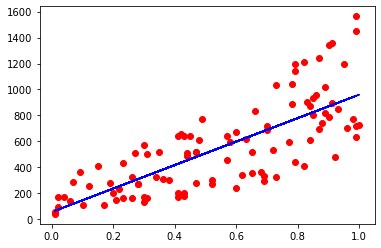

In [228]:
plt.scatter(X,y, color = 'red')
plt.plot(X,lin_reg.predict(X), color = 'blue')

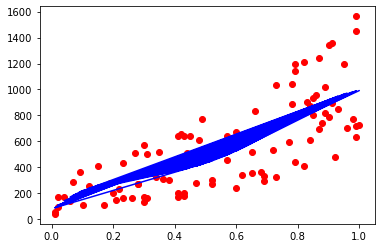

In [229]:
plt.scatter(X,y, color = 'red')
plt.plot(X,lin_reg_2.predict(poly_reg.fit_transform(X)), color = 'blue')

# Multi- linear regression is best suited for this data set

# Que 2

Problem Statement 2:
A dataset collected in a cosmetics shop showing details of customers and whether or not they responded to a special offer to buy a new lipstick is shown in the table below. Use this dataset to build a decision tree, with Buys as the target variable, to help in buying lip-sticks in the future. Find the root node of the decision tree. According to the decision tree, you have made from the previous Training data set, what is the decision for the test data: [Age < 21, Income = Low, Gender = Female, Marital Status = Married]? Write the concluding statement for the implemented application.


In [77]:
dataset1 = pd.read_csv('Book1.csv')

In [173]:
dataset1

,ID,Age,Income,Gender,Marital Status,Buys
0,1,< 21,High,Male,Single,No
1,2,< 21,High,Male,Married,No
2,3,21-35,High,Male,Single,Yes
3,4,>35,Medium,Male,Single,Yes
4,5,>35,Low,Female,Single,Yes
5,6,>35,Low,Female,Married,No
6,7,21-35,Low,Female,Married,Yes
7,8,< 21,Medium,Male,Single,No
8,9,< 21,Low,Female,Married,Yes
9,10,>35,Medium,Female,Single,Yes


In [165]:
dataset1.shape

(14, 6)

<AxesSubplot:xlabel='Age', ylabel='count'>

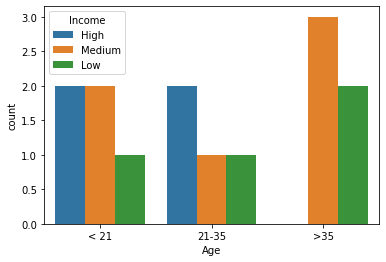

In [172]:
sns.countplot ( x = 'Age',hue='Income', data = dataset1)

### => peaple with age greater than 35 don't have High income
### => people with age greater than 35 mostly have medium income and low salary
### => There are equal number of people having high and medium income and age less than 21
### => People having age between 21 and 35 mostly have high income

<AxesSubplot:xlabel='Age', ylabel='count'>

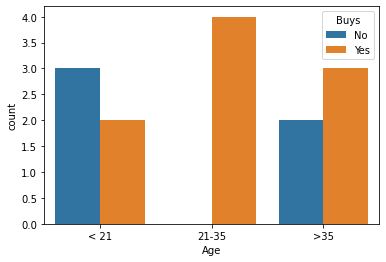

In [174]:
sns.countplot ( x = 'Age',hue='Buys', data = dataset1)

#### => People having age between 21 and 35 mostly buys and no people of this range who dont buy
#### => People of age less than 21 have less number of people than who don't buy
#### => People of age greater than 35 have more number of people than who don't buy

<AxesSubplot:xlabel='Gender', ylabel='count'>

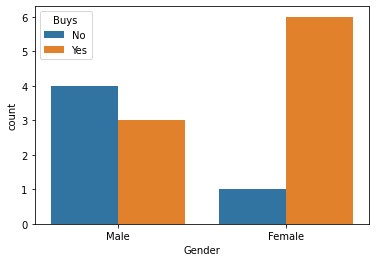

In [175]:
sns.countplot ( x = 'Gender',hue='Buys', data = dataset1)

#### => Count of female buyer is more than males
#### => Count of Male who buys is less than count of males who don't buy
#### => count of Female who don't buy is very less

<AxesSubplot:xlabel='Marital Status', ylabel='count'>

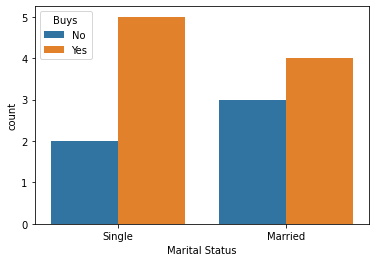

In [176]:
sns.countplot ( x = 'Marital Status',hue='Buys', data = dataset1)

#### => Count of unmarid people buys is more 

<AxesSubplot:xlabel='Income', ylabel='count'>

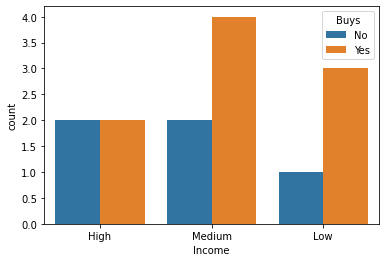

In [230]:
sns.countplot ( x = 'Income',hue='Buys', data = dataset1)

### => People who have medium salary are most who buys

In [179]:
df = dataset1.drop(['ID'],axis=1)

In [180]:
from sklearn.preprocessing  import LabelEncoder
l = LabelEncoder();
x = df.iloc[:,:-1]
x=x.apply(l.fit_transform)

In [182]:
x

,Age,Income,Gender,Marital Status
0,1,0,1,1
1,1,0,1,0
2,0,0,1,1
3,2,2,1,1
4,2,1,0,1
5,2,1,0,0
6,0,1,0,0
7,1,2,1,1
8,1,1,0,0
9,2,2,0,1


here we can observe
Age column is labeled as
    '<21'   => 1
    '21-35' => 0
    '>35'   => 2
Income column is labeled as
    'High'    => 0
    'Low'     => 1
    'Meadium' => 2
Gender column is labeled as
    'Male'  => 1
    'Female'=> 0
Gender column is labeled as
    'Single'  => 1
    'Married' => 0

In [183]:
y = df.iloc[:,-1]

In [184]:
y

0      No
1      No
2     Yes
3     Yes
4     Yes
5      No
6     Yes
7      No
8     Yes
9     Yes
10    Yes
11    Yes
12    Yes
13     No
Name: Buys, dtype: object

In [185]:
x

,Age,Income,Gender,Marital Status
0,1,0,1,1
1,1,0,1,0
2,0,0,1,1
3,2,2,1,1
4,2,1,0,1
5,2,1,0,0
6,0,1,0,0
7,1,2,1,1
8,1,1,0,0
9,2,2,0,1


In [186]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier (criterion = 'entropy')
classifier.fit(x,y)

DecisionTreeClassifier(criterion='entropy')

In [126]:
from sklearn.tree import DecisionTreeClassifier
Classifier = DecisionTreeClassifier(criterion='entropy', random_state=1)

In [189]:
test= np.array([2,2,1,0])
pred_y = classifier.predict ([test])
print("predicted class for given question",test,"is",pred_y[0])

predicted class for given question [2 2 1 0] is No


In [129]:
y_pred=Classifier.predict(X_test)

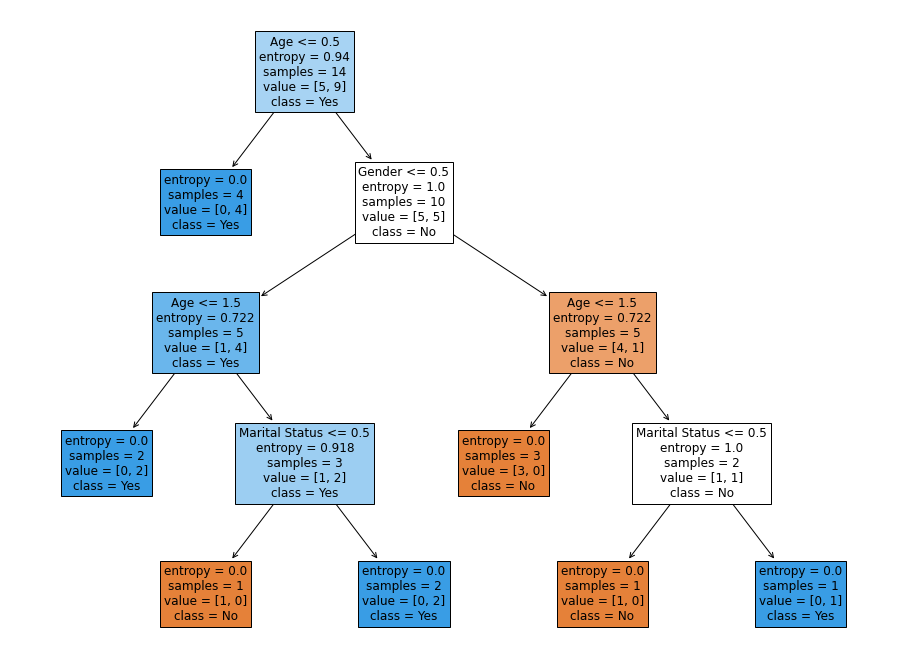

In [190]:
from sklearn.tree import plot_tree 
fig = plt.figure(figsize = (16,12))
a= plot_tree (classifier, feature_names = df.columns , fontsize = 12, filled = True, class_names=['No','Yes'])

In [133]:
# Accuracy check using Accuracy score function
accuracy_score(y_test,y_pred)

0.5833333333333334